In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(0,50,501)
y = np.sin(x)

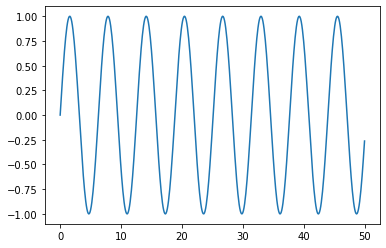

In [3]:
plt.plot(x,y)

In [4]:
df = pd.DataFrame(data=y,index=x,columns=['Sine'])
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [5]:
# Train Test Spliting

In [6]:
test_percent = 0.1
test_point = np.round(len(df)*test_percent)
test_point

50.0

In [7]:
# We have found our total number of test data
# Now we need have the index where our test data begins

test_ind = int(len(df) - test_point)
test_ind

451

In [8]:
# So now, we will split Train and Test
# Train -> from start and upto test index
# Test -> from test index to last one

train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

print(train)
print(test)

          Sine
0.0   0.000000
0.1   0.099833
0.2   0.198669
0.3   0.295520
0.4   0.389418
...        ...
44.6  0.579164
44.7  0.657656
44.8  0.729577
44.9  0.794208
45.0  0.850904

[451 rows x 1 columns]
          Sine
45.1  0.899097
45.2  0.938307
45.3  0.968142
45.4  0.988304
45.5  0.998591
45.6  0.998900
45.7  0.989229
45.8  0.969673
45.9  0.940429
46.0  0.901788
46.1  0.854137
46.2  0.797952
46.3  0.733794
46.4  0.662304
46.5  0.584197
46.6  0.500252
46.7  0.411309
46.8  0.318257
46.9  0.222024
47.0  0.123573
47.1  0.023888
47.2 -0.076037
47.3 -0.175201
47.4 -0.272615
47.5 -0.367305
47.6 -0.458325
47.7 -0.544766
47.8 -0.625764
47.9 -0.700509
48.0 -0.768255
48.1 -0.828324
48.2 -0.880118
48.3 -0.923117
48.4 -0.956893
48.5 -0.981108
48.6 -0.995521
48.7 -0.999986
48.8 -0.994460
48.9 -0.978997
49.0 -0.953753
49.1 -0.918979
49.2 -0.875023
49.3 -0.822324
49.4 -0.761408
49.5 -0.692885
49.6 -0.617439
49.7 -0.535823
49.8 -0.448854
49.9 -0.357400
50.0 -0.262375


In [9]:
# Scale or Normalize the data

from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

scaler.fit(train)

scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [12]:
# Now we will implement Time Series Generator

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [13]:
# define generator

# Length of the data set which will be considred for the prediction
length = 2 

#Number of prediction
batch_size = 1 

#generator = TimeseriesGenerator(traing value for traing, training value for prediction, length=length, batch_size=batch_size)
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)

In [15]:
# What does the first batch look like?
X,y = generator[5]

print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.73971381 0.78232262]
Predict this y: 
 [[0.82211054]]


In [22]:
# Length depends on approximate number of samples we need to define a pattern
length = 50 
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [23]:
# Model Creation

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,SimpleRNN

In [25]:
# We're only using one feature in our time series, that is x value
n_features = 1

In [26]:
# define model
model = Sequential()

# Simple RNN layer
#model.add(SimpleRNN(Neuron Number,input_shape=(length, n_features)))
model.add(SimpleRNN(50,input_shape=(length, n_features)))

# Final Prediction
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [27]:
# fit model
model.fit_generator(generator,epochs=5)

C:\Users\User\AppData\Local\Temp\ipykernel_5340\2200378995.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=5)


Epoch 1/5
401/401 [==============================] - 2s 4ms/step - loss: 0.0049
Epoch 2/5
401/401 [==============================] - 2s 4ms/step - loss: 5.3062e-05
Epoch 3/5
401/401 [==============================] - 2s 4ms/step - loss: 6.9379e-05
Epoch 4/5
401/401 [==============================] - 2s 4ms/step - loss: 0.0012
Epoch 5/5
401/401 [==============================] - 2s 4ms/step - loss: 4.4138e-05


<AxesSubplot:>

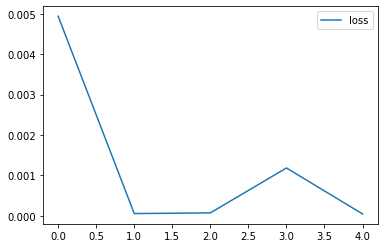

In [28]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [29]:
# Evaluate the Model

In [31]:
xx= [[1,2,3],[4,5,6]]
xx[-1:]

[[4, 5, 6]]

In [30]:
first_eval_batch = scaled_train[-length:]
first_eval_batch

array([[8.37405820e-01],
       [7.98881698e-01],
       [7.57371240e-01],
       [7.13289205e-01],
       [6.67076045e-01],
       [6.19193508e-01],
       [5.70120021e-01],
       [5.20345908e-01],
       [4.70368497e-01],
       [4.20687145e-01],
       [3.71798252e-01],
       [3.24190300e-01],
       [2.78338972e-01],
       [2.34702398e-01],
       [1.93716581e-01],
       [1.55791039e-01],
       [1.21304709e-01],
       [9.06021693e-02],
       [6.39901882e-02],
       [4.17346643e-02],
       [2.40579672e-02],
       [1.11367167e-02],
       [3.10001778e-03],
       [2.81703720e-05],
       [1.95186738e-03],
       [8.85188786e-03],
       [2.06592891e-02],
       [3.72560954e-02],
       [5.84764771e-02],
       [8.41084070e-02],
       [1.13895779e-01],
       [1.47540969e-01],
       [1.84707803e-01],
       [2.25024924e-01],
       [2.68089497e-01],
       [3.13471233e-01],
       [3.60716695e-01],
       [4.09353821e-01],
       [4.58896644e-01],
       [5.08850150e-01],


In [32]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))

In [35]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 181ms/step


array([[0.95173615]], dtype=float32)

In [36]:
scaled_test[0]

array([0.94955134])

In [37]:
# So, here,as demo
# we are passing last 50 values from train test and predicting the next value
# we must be similar to the first value of test set
# We have found similar values
# Means our model is good

In [38]:
# Now we will put the previous logic in a loop 
# Where all 50 values from test set, will be used to predict values one after another

In [39]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))


In [42]:
for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 17ms/step


In [43]:
# Inverse predictions to compare with tru values
true_predictions = scaler.inverse_transform(test_predictions)

In [44]:
# We are adding new column to our test dataframe
test['Predictions'] = true_predictions

C:\Users\User\AppData\Local\Temp\ipykernel_5340\2635072001.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [45]:
test

,Sine,Predictions
45.1,0.899097,0.903467
45.2,0.938307,0.942516
45.3,0.968142,0.974403
45.4,0.988304,0.995640
45.5,0.998591,1.007011
45.6,0.998900,1.009871
45.7,0.989229,1.002269
45.8,0.969673,0.985514
45.9,0.940429,0.959627
46.0,0.901788,0.925323


<AxesSubplot:>

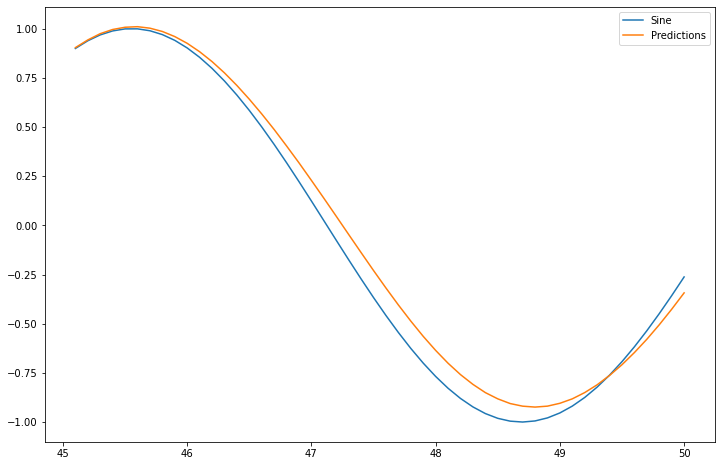

In [46]:
test.plot(figsize=(12,8))

In [47]:
# Introducing Early Stopping
from tensorflow.keras.callbacks import EarlyStopping

In [48]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',patience=2)

In [50]:
# For validation ---> we need to have more to feed than to predict
# Here we are taking length less than previos
#`start_index+length=50 > end_index=49` is disallowed, as no part of the sequence would be left to be used as current step

length = 49

# Training Generator
generator = TimeseriesGenerator(scaled_train,scaled_train,
                               length=length,batch_size=1)

# Testing Generator
validation_generator = TimeseriesGenerator(scaled_test,scaled_test,
                                          length=length,batch_size=1)

In [51]:
# Implementing LSTM

# define model
model = Sequential()

# Simple RNN layer
model.add(LSTM(50,input_shape=(length, n_features)))

# Final Prediction
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [52]:
model.fit_generator(generator,epochs=20,
                   validation_data=validation_generator,
                   callbacks=[early_stop])

Epoch 1/20


C:\Users\User\AppData\Local\Temp\ipykernel_5340\1950115197.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=20,


402/402 [==============================] - 7s 12ms/step - loss: 0.0197 - val_loss: 2.7607e-04
Epoch 2/20
402/402 [==============================] - 4s 11ms/step - loss: 2.8484e-04 - val_loss: 2.1174e-04
Epoch 3/20
402/402 [==============================] - 4s 10ms/step - loss: 1.1197e-04 - val_loss: 5.1622e-05
Epoch 4/20
402/402 [==============================] - 4s 10ms/step - loss: 1.0682e-04 - val_loss: 7.0217e-06
Epoch 5/20
402/402 [==============================] - 4s 10ms/step - loss: 3.0806e-04 - val_loss: 7.7555e-05
Epoch 6/20
402/402 [==============================] - 4s 10ms/step - loss: 7.5962e-05 - val_loss: 2.5751e-05


In [53]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 17ms/step


C:\Users\User\AppData\Local\Temp\ipykernel_5340\2865774970.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LSTM Predictions'] = true_predictions


<AxesSubplot:>

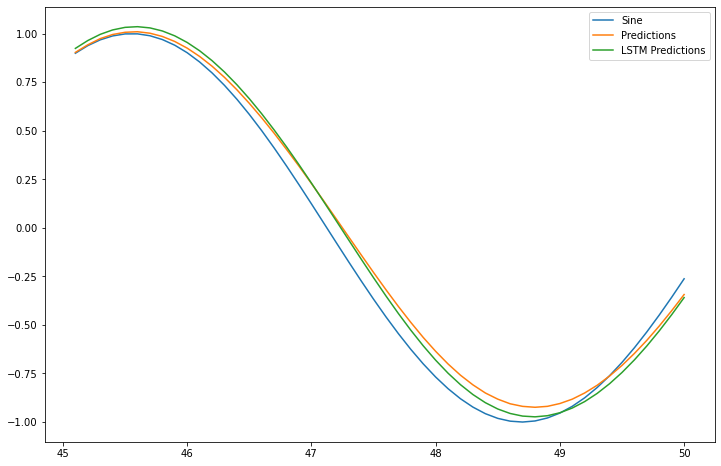

In [54]:
# Evaluation

true_predictions = scaler.inverse_transform(test_predictions)
test['LSTM Predictions'] = true_predictions
test.plot(figsize=(12,8))

In [55]:
# Forecasting unknown value

<AxesSubplot:>

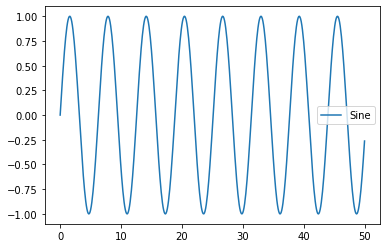

In [57]:
df.plot()

In [56]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [58]:
length = 50 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [59]:
model = Sequential()
model.add(LSTM(50, input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit_generator(generator,epochs=6)

Epoch 1/6


C:\Users\User\AppData\Local\Temp\ipykernel_5340\2968077443.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=6)


451/451 [==============================] - 7s 11ms/step - loss: 0.0175
Epoch 2/6
451/451 [==============================] - 4s 10ms/step - loss: 7.3363e-05
Epoch 3/6
451/451 [==============================] - 5s 10ms/step - loss: 5.0371e-04
Epoch 4/6
451/451 [==============================] - 5s 10ms/step - loss: 1.3156e-04
Epoch 5/6
451/451 [==============================] - 5s 10ms/step - loss: 1.2615e-04
Epoch 6/6
451/451 [==============================] - 5s 10ms/step - loss: 2.8365e-04


In [60]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 19ms/step


In [61]:
forecast = scaler.inverse_transform(forecast)

In [62]:
# Now we need an index value, from where, we will draw our forecast line as the training one
# We start at 50.1 as last value in dataframe was 50 and step size is .1
# And last step or forecast will end at 50 -> test/ Prediction size * Step size 
# 50*.1=5.1

forecast_index = np.arange(50.1,55.1,step=0.1)

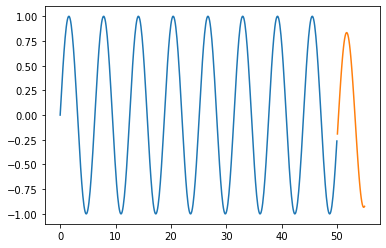

In [63]:
plt.plot(df['Sine'])
plt.plot(forecast_index,forecast)